<a href="https://colab.research.google.com/github/Pothuraju1690/pothuraju-2000/blob/main/MOVIE_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df1 = pd.read_csv('/content/credits.csv', nrows=4198, error_bad_lines=False)
df2 = pd.read_csv('/content/movies.csv')

<ipython-input-64-2de4fba3565d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('/content/credits.csv', nrows=4198, error_bad_lines=False)


In [ ]:
df1.head()

,id,tittle,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:

df1.columns=['id','tittle','cast','crew']
df2=df2.merge(df1,on='id')

In [ ]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
C= df2['vote_average'].mean()
C

6.170962363030014

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

2033.6000000000004

In [ ]:

q_movies=df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(420, 23)

In [ ]:
def weighted_movie(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    #calculation based on IMDB formula

    return (v/(v+m)*R) + (m/(m+v)*C)

In [ ]:
#define a new feature 'score' and calculate its value with weighted_rating()

q_movies['score']= q_movies.apply(weighted_movie,axis=1)

In [ ]:
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)


,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.037404
662,Fight Club,9413,8.3,7.921756
65,The Dark Knight,12002,8.2,7.906015
3232,Pulp Fiction,8428,8.3,7.886143
96,Inception,13752,8.1,7.851489
3337,The Godfather,5893,8.4,7.828132
95,Interstellar,10867,8.1,7.795914
809,Forrest Gump,7927,8.2,7.785743
329,The Lord of the Rings: The Return of the King,8064,8.1,7.711503
1990,The Empire Strikes Back,5879,8.2,7.678521


In [ ]:
# We have made our first(though very basic) recommender.
#Under the Trending Now tab of these systems we find movies that are very popular
#and they can just be obtained by sorting the dataset by the popularity column.


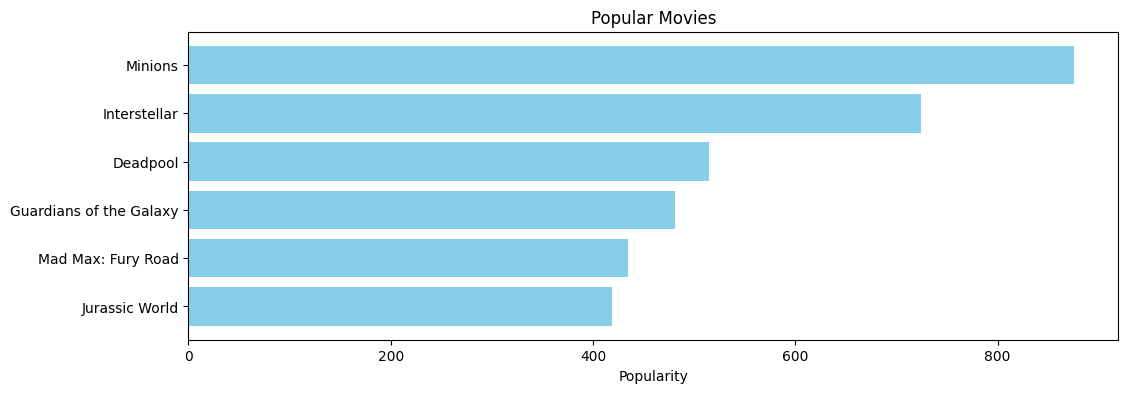

In [ ]:
pop= df2.sort_values('popularity',ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()


In [ ]:
# In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies.
#Then the movies that are most likely to be similar are recommended.

In [ ]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(stop_words='english')

# Replace Nan with an empty string
df2['overview']=df2['overview'].fillna('')

# construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix= tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4198, 19514)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim= linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
# construct a reverse map of indices and movie titles
indices= pd.Series(df2.index, index=df2['title']).drop_duplicates()


In [ ]:
# Function that takes in movie title & outputs similar movies
def get_recommendation(title,cosine_sim=cosine_sim):
    # get the index of the movie that matches the title
    idx= indices[title]

    # get the pairwise similarity scores of all the movies with that movie
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on similarity scores
    sim_scores= sorted(sim_scores,key=lambda x :x[1], reverse=True)

    # get the scors of the 10 most similar movies
    sim_scores=sim_scores[1:11]

    #get the movie indices
    movie_indices=[i[0] for i in sim_scores]

    # return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendation('The Dark Knight Rises')


65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
2507                                  Slow Burn
119                               Batman Begins
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendation('The Avengers')


7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1286                        Snowpiercer
256                           Allegiant
Name: title, dtype: object

In [ ]:
# parse the stringified features into their corresponding python objects
from ast import literal_eval
features=['cast','crew','keywords','genres']
for feature in features:
    df2[feature]= df2[feature].apply(literal_eval)

In [ ]:
# get the director's name from crew feature. If director is not  listed, return NAn

def get_director(x):
    for i in x:
        if i['job']=='Director':
            return i['name']
        return np.nan


In [ ]:
# return the list top 3 elements or entire list ; whichever is more.
def get_list(x):
    if isinstance(x,list):
        names=[i['name'] for i in x]
        # check if more than 3 elements exists, If yes, return only first three. If no , return entire list
        if len(names)>3:
            names=names[:3]
            return names
        #return empty list in case of missing/malformed data
        return []

In [ ]:
# define new director , cast , genere and keywords features that are in suitable form

df2['director']=df2['crew'].apply(get_director)
features=['cast','keywords','genres']
for feature in features:
    df2[feature]=df2[feature].apply(get_list)

In [ ]:
# print new features of the first three films

df2[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",NaN,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",NaN,"[ocean, drug abuse, exotic island]",[]
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",NaN,"[spy, based on novel, secret agent]",[]


In [ ]:
# function to conver all strings to lower case and strip names of spaces

def clean_data(x):
    if isinstance(x,list):
        return[str.lower(i.replace(" ","")) for i in x]
    else:
        #check if director exists. If not, return empty string
        if isinstance(x,str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [ ]:
# apply clean_data function to your features.
features=['cast','keywords','director','genres']

for feature in features:
    df2[feature]=df2[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count= CountVectorizer(stop_words='english')
count_matrix= count.fit_transform(df2['soup'])

In [ ]:
# compute the cosine similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2=cosine_similarity(count_matrix,count_matrix)

In [ ]:
# reset index of our main datafrsme  and construct reverse mapping as before
df2= df2.reset_index()
indices= pd.Series(df2.index, index=df2['title'])

In [ ]:
get_recommendation('The Dark Knight Rises',cosine_sim2)

65                 The Dark Knight
3073             Romeo Is Bleeding
119                  Batman Begins
747                 Gangster Squad
1470                        Stolen
1503                        Takers
1986                        Faster
2154                  Street Kings
2277    The Baader Meinhof Complex
3332                   Harry Brown
Name: title, dtype: object

In [ ]:
get_recommendation('The Godfather',cosine_sim2)

4124                     This Thing of Ours
867                 The Godfather: Part III
347       Cloudy with a Chance of Meatballs
496     Cloudy with a Chance of Meatballs 2
499                           Jack and Jill
2401                         City of Ghosts
2649                      The Son of No One
4147                       Small Apartments
3069                          Danny Collins
20                   The Amazing Spider-Man
Name: title, dtype: object

In [ ]:
pip install scikit-surprise


In [ ]:
from surprise import Reader , Dataset , SVD
from surprise.model_selection import cross_validate

In [ ]:
reader= Reader()
ratings= pd.read_csv("/content/rotten_tomatoes_top_movies.csv")
ratings.head()

,Unnamed: 0,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,...,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew,link
0,0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,...,"Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",http://www.rottentomatoes.com/m/black_panther_...
1,1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,...,"Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",http://www.rottentomatoes.com/m/avengers_endgame
2,2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,...,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P...",http://www.rottentomatoes.com/m/mission_imposs...
3,3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,...,"May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu...",http://www.rottentomatoes.com/m/mad_max_fury_road
4,4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,...,"Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al...",http://www.rottentomatoes.com/m/spider_man_int...


In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'ratings']], reader)
trainset, testset = train_test_split(data, test_size=0.2)


In [ ]:
svd=SVD()
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId']==1]

In [ ]:
\predict(1, 302, 3)svd

SyntaxError: unexpected character after line continuation character (<ipython-input-117-11447fb60b8b>, line 1)